<a href="https://colab.research.google.com/github/aniketinamdar/Quantum-Leap/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [1]:
import pandas as pd
import os
import shutil
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

Defining the paths

In [2]:
root_dir = '/content/drive/MyDrive/qleap'

In [3]:
train_csv_path = f'{root_dir}/train.csv'
test_csv_path = f'{root_dir}/test.csv'
train_folder_path = f'{root_dir}/train'
test_folder_path = f'{root_dir}/test'

Loading the CSV data

In [5]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

Defining Image directories and copying the images

In [6]:
train_images_dir = f'{root_dir}/train/images'
test_images_dir = f'{root_dir}/test/images'

if not os.path.exists(train_images_dir):
    os.makedirs(train_images_dir, exist_ok=True)
    for i, row in train_data.iterrows():
        shutil.copy(os.path.join(train_folder_path, row['filename']), f"{train_images_dir}/{row['filename']}")
else:
    print(f"{train_images_dir} already exists, skipping copy for training images.")

if not os.path.exists(test_images_dir):
    os.makedirs(test_images_dir, exist_ok=True)
    for i, row in test_data.iterrows():
        shutil.copy(os.path.join(test_folder_path, row['filename']), f"{test_images_dir}/{row['filename']}")
else:
    print(f"{test_images_dir} already exists, skipping copy for testing images.")

/content/drive/MyDrive/qleap/train/images already exists, skipping copy for training images.
/content/drive/MyDrive/qleap/test/images already exists, skipping copy for testing images.


Data Preprocessing, creating data generator (training,validation)

In [ ]:
print(os.listdir(f'{root_dir}/train/images'))

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=f'{root_dir}/train/images',
    x_col='filename',
    y_col='category',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=f'{root_dir}/train/images',
    x_col='filename',
    y_col='category',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical', # Fixed the typo here
    subset='validation'
)

['result_table_img_97170_1_1710504721.jpg', 'result_table_img_87230_0_1707777174.jpg', 'result_table_img_66821_1_1699632838.jpg', 'result_table_img_35196_0_1684777483.jpg', 'result_table_img_93443_0_1709585715.jpg', 'result_table_img_13371_2_1674763119.jpg', 'result_table_img_21486_0_1675976453.jpg', 'result_table_img_88048_13_1707955028.jpg', 'result_table_img_78561_0_1705076996.jpg', 'result_table_img_88048_8_1707954183.jpg', 'result_table_img_44636_0_1689845391.jpg', 'result_table_img_3620_0_1645206158.jpg', 'result_table_img_104390_0_1712348820.jpg', 'result_table_img_58689_0_1696340431.jpg', 'result_table_img_19128_2_1674486755.jpg', 'result_table_img_3802_0_1646751162.jpg', 'WHEELER_MATERIAL_HANDLING.png', 'result_table_img_60042_0_1696951015.jpg', 'result_table_img_50946_1_1692725163.jpg', 'result_table_img_88112_3_1708002320.jpg', 'result_table_img_22784_0_1677007232.jpg', 'result_table_img_83712_1_1706665428.jpg', 'result_table_img_62193_1_1697740504.jpg', 'result_table_img_65

In [ ]:
class_indices = train_generator.class_indices

In [ ]:
print(class_indices)

{'bordered': 0, 'borderless': 1, 'row_bordered': 2}


Load and preprocess image

In [ ]:
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize pixel values
    return img_array

Define model architecture

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


Compile model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)

Epoch 1/100
32/32 [==============================] - 35s 849ms/step - loss: 2.4889 - accuracy: 0.4414 - val_loss: 1.0098 - val_accuracy: 0.1116
Epoch 2/100
32/32 [==============================] - 27s 853ms/step - loss: 0.9980 - accuracy: 0.5636 - val_loss: 0.7746 - val_accuracy: 0.7291
Epoch 3/100
32/32 [==============================] - 27s 835ms/step - loss: 0.8537 - accuracy: 0.6272 - val_loss: 1.5310 - val_accuracy: 0.2351
Epoch 4/100
32/32 [==============================] - 28s 893ms/step - loss: 0.6640 - accuracy: 0.7117 - val_loss: 0.9181 - val_accuracy: 0.4622
Epoch 5/100
32/32 [==============================] - 27s 844ms/step - loss: 0.5704 - accuracy: 0.7515 - val_loss: 1.3491 - val_accuracy: 0.5179
Epoch 6/100
32/32 [==============================] - 28s 886ms/step - loss: 0.4613 - accuracy: 0.8340 - val_loss: 1.0092 - val_accuracy: 0.5219
Epoch 7/100
32/32 [==============================] - 28s 894ms/step - loss: 0.3165 - accuracy: 0.8817 - val_loss: 0.6774 - val_accuracy:

Saving the model

In [ ]:
model.save('table_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizing the results

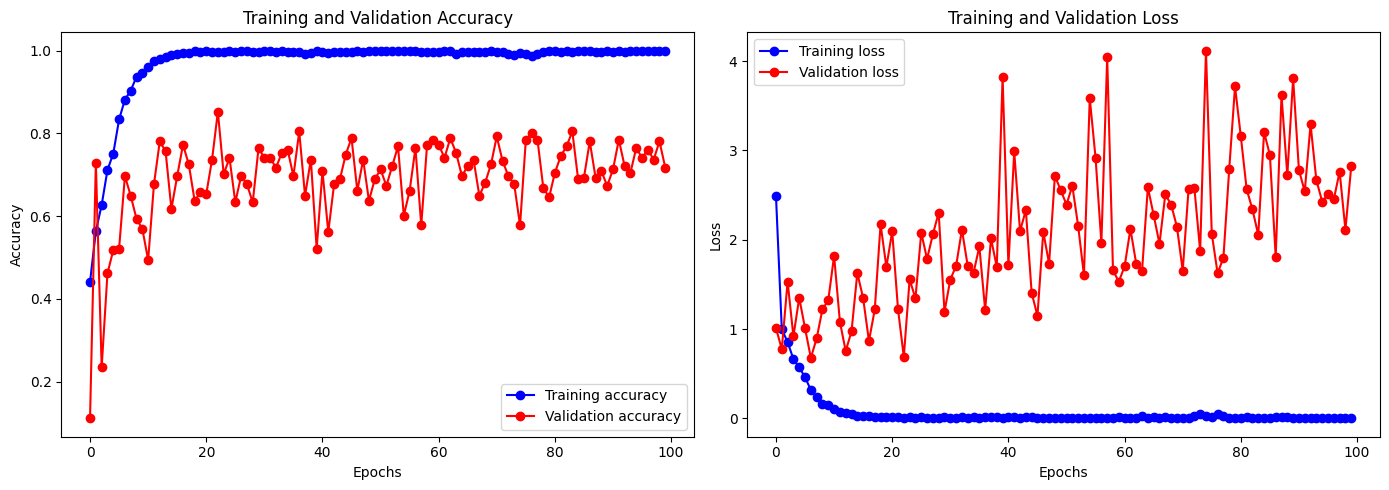

In [ ]:
import matplotlib.pyplot as plt

# Extracting data from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=test_images_dir,
    x_col='filename',
    y_col='category',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 300 validated image filenames belonging to 3 classes.


In [10]:
from tensorflow.keras.models import load_model

In [8]:
model_path = "/content/drive/MyDrive/qleap/model_100.h5"

In [11]:
model = load_model(model_path)

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

10/10 [==============================] - 101s 11s/step - loss: 1.3532 - accuracy: 0.8433
Test Loss: 1.3531811237335205
Test Accuracy: 0.8433333039283752


In [13]:
test_predictions = model.predict(test_generator)
test_predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = test_generator.classes

10/10 [==============================] - 5s 459ms/step


In [14]:
from sklearn.metrics import classification_report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, test_predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

    bordered       0.81      0.84      0.82       100
  borderless       0.89      0.94      0.91       100
row_bordered       0.83      0.75      0.79       100

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

